In [6]:
import easyocr

In [51]:
from PIL import Image
import io

In [ ]:
reader = easyocr.Reader(['en'])
image_path = "C:\\Users\\Saravanan\\OneDrive\\Desktop\\Bizcard\\1.png"
result = reader.readtext(image_path)
result

In [9]:

reader = easyocr.Reader(['en'], gpu=False)
image_path = "C:\\Users\\Saravanan\\OneDrive\\Desktop\\Bizcard\\1.png"
image_data = reader.readtext(image_path, detail = 0)
image_data

Using CPU. Note: This module is much faster with a GPU.


['Selva',
 'DATA MANAGER',
 '+123-456-7890',
 '+123-456-7891',
 'WWW XYZI.com',
 'hello@XYZ1.com',
 '123 ABC St , Chennai;',
 'selva',
 'TamilNadu 600113',
 'digitals']

In [39]:
image = Image.open(image_path)
# Convert RGBA image to RGB
image = image.convert('RGB')

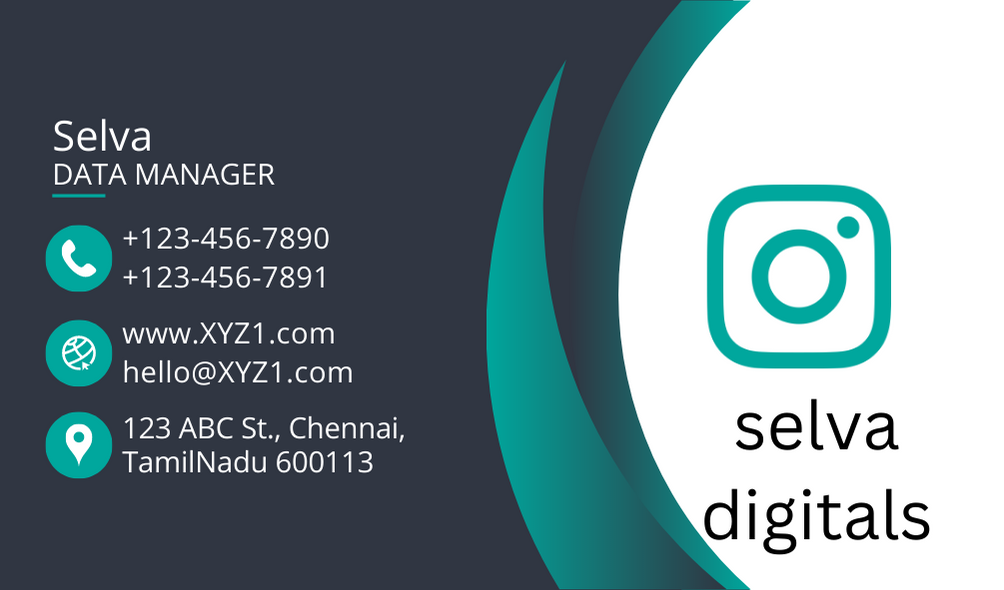

In [40]:
image

In [13]:
# Convert the image to binary data
def img_to_binary(image):
    image_binary = io.BytesIO()
    image.save(image_binary, format='JPEG')
    image_binary = image_binary.getvalue()
    return image_binary

In [41]:
details =[]
for i in range(len(result)):
    details.append(result[i][1])
name = []
designation = []
contact =[]
email =[]
website = []
street =[]
city =[]
state =[]
pincode=[]
company =[]

In [21]:
details

['Selva',
 'DATA MANAGER',
 '+123-456-7890',
 '+123-456-7891',
 'WWW XYZI.com',
 'hello@XYZ1.com',
 '123 ABC St , Chennai;',
 'selva',
 'TamilNadu 600113',
 'digitals']

In [22]:
image_data

['Selva',
 'DATA MANAGER',
 '+123-456-7890',
 '+123-456-7891',
 'WWW XYZI.com',
 'hello@XYZ1.com',
 '123 ABC St , Chennai;',
 'selva',
 'TamilNadu 600113',
 'digitals']

In [57]:


def extracted_text(details, image_path):
    image = Image.open(image_path)
    
    data = {
        "name": [],
        "designation": [],
        "contact": [],
        "email": [],
        "website": [],
        "address": [],
        "city": [],
        "state": [],
        "pincode": [],
        "company": [],
        "image" : image
    }

    for i in range(len(details)):
        match1 = re.findall('([0-9]+ [A-Z]+ [A-Za-z]+)., ([a-zA-Z]+). ([a-zA-Z]+)', details[i])
        match2 = re.findall('([0-9]+ [A-Z]+ [A-Za-z]+)., ([a-zA-Z]+)', details[i])
        
        match4 = re.findall('([A-Za-z]+) ([0-9]+)', details[i])
        match5 = re.findall('([0-9]+ [a-zA-z]+)', details[i])
        match7 = re.findall('([0-9]+)', details[i])
        
        if i == 0:
            data["name"].append(details[i])
        elif i == 1:
            data["designation"].append(details[i])
        elif '-' in details[i]:
            data["contact"].append(details[i])
        elif '@' in details[i]:
            data["email"].append(details[i])
        elif "www " in details[i].lower() or "www." in details[i].lower():
            data["website"].append(details[i])
        elif "WWW" in details[i]:
            data["website"].append(details[i] + "." + details[i+1])
        elif match1:
            data["street"].append(match1[0][0])
            data["city"].append(match1[0][1])
            data["state"].append(match1[0][2])
        elif match2:
            data["address"].append(match2[0][0])
            data["city"].append(match2[0][1])
        elif match4:
            data["state"].append(match4[0][0])
            data["pincode"].append(match4[0][1])
        elif match5:
            data["street"].append(match5[0] + ' St,')
        elif match7:
            data["pincode"].append(match7[0])
        else:
            data["company"].append(details[i])
    
    data["contact"] = [" & ".join(data["contact"])]
    # Join company names with comma and space
    data["company"] = [" ".join(data["company"])]
    return data


In [58]:
data = extracted_text(details,image_path)
data

{'name': ['Selva'],
 'designation': ['DATA MANAGER'],
 'contact': ['+123-456-7890 & +123-456-7891'],
 'email': ['hello@XYZ1.com'],
 'website': ['WWW XYZI.com'],
 'address': ['123 ABC St'],
 'city': ['Chennai'],
 'state': ['TamilNadu'],
 'pincode': ['600113'],
 'company': ['selva digitals'],
 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1004x590>}

In [59]:
df = pd.DataFrame(data)
df

,name,designation,contact,email,website,address,city,state,pincode,company,image
0,Selva,DATA MANAGER,+123-456-7890 & +123-456-7891,hello@XYZ1.com,WWW XYZI.com,123 ABC St,Chennai,TamilNadu,600113,selva digitals,<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [53]:
import psycopg2

In [70]:
mydb = psycopg2.connect(host='localhost', user='postgres', password='123456', database='bizcard', port=5432)
cursor = mydb.cursor()

In [71]:
def details_table():
    create_query='''create table if not exists image(
                                                    id int primary key,
                                                    name varchar(70),
                                                    designation varchar(100),
                                                    contact varchar(50),
                                                    email varchar(50),
                                                    website varchar(75),
                                                    address varchar(200),
                                                    city varchar(50),
                                                    state varchar(50),
                                                    pincode varchar(50),
                                                    company varchar(75),
                                                    image BYTEA

    )'''
    cursor.execute(create_query)
    mydb.commit()

# df = pd.DataFrame(data)
# df

    
# for index,row in df.iterrows():
#     insert_query='''insert into image(
                                        
#     )'''
        

In [72]:
a=details_table()
a